#Schelling's Segregation Model

##Outline

In 1969, Thomas C. Schelling developed a simple but striking model of racial segregation.

In this lecture we (in fact you) will build and run a version of Schelling’s model

##The Model

### Set Up
The location of an agent is just a point $(x,y)$
where $0<x,y<1$

### Preference

An agent is happy if half or more of her 10 nearest neighbors are of the same type

Here ‘nearest’ is in terms of Euclidean distance

An agent who is not happy is called unhappy.

Agents are not averse to living in mixed areas

They are perfectly happy if half their neighbors are of the other color.

###Behavior

- Draw a random location in $S$.
- If happy at new location, move there.
- Else, go to the first step.




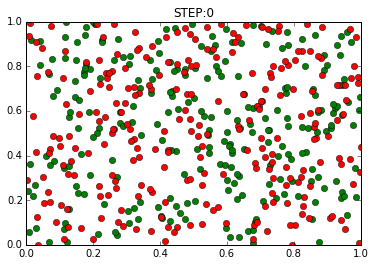

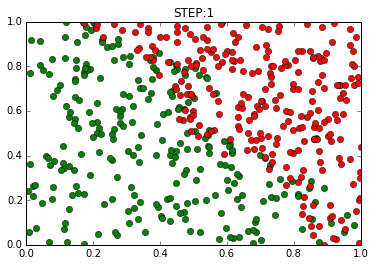

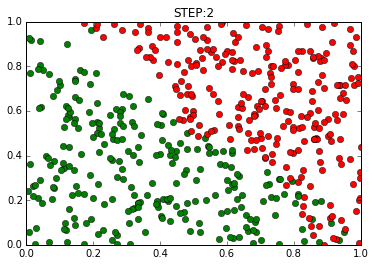

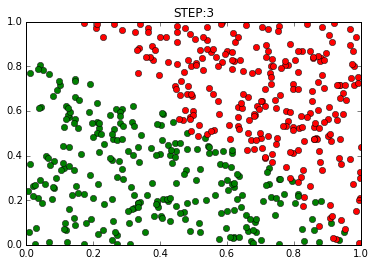

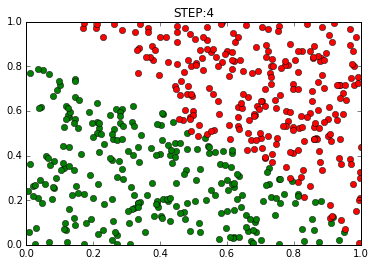

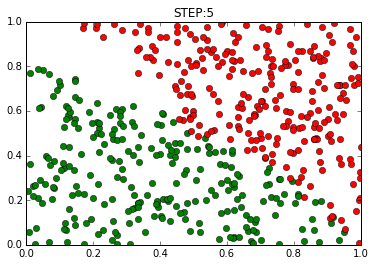

In [13]:
t = Town(250,250)

%matplotlib inline
t.make_ev_happy()

In [12]:
from random import uniform
class Town :
    
    def __init__(self,n_g,n_or) :
        self.n_g, self.n_or = n_g, n_or
        self.N = n_g + n_or
        #import numpy as np
        self.list_people = []
        #orange = 1,green=0
        
        
        for i in range(self.n_g):
            individual = Schelling(0)
            individual.index = i
            self.list_people.append(individual)
        for i in range(self.n_or):
            individual = Schelling(1)
            individual.index = i+self.n_g
            self.list_people.append(individual)
            
    def ask(self,individual):
        others = self.list_people[:]
        others.pop(individual.index)
        
        others_loc_type = []
        location_x = []
        location_y = []
        type_set = []
        for other in others:
            location_x.append(other.x)
            location_y.append(other.y)
            type_set.append(other.type_)
        
        others_loc_type.append(location_x)
        others_loc_type.append(location_y)
        others_loc_type.append(type_set)
            
        return individual.emotion(others_loc_type)
    
    def show_map(self,label):
        self.label = label #label have to be str.
        import matplotlib.pyplot as plt

        N = self.n_or + self.n_g
        x_g = []
        x_or = []
        y_g = []
        y_or = []
        
        for i in range(N):  
            if self.list_people[i].type_ == 1:
                x_g.append(self.list_people[i].x)
                y_g.append(self.list_people[i].y)
            else:
                x_or.append(self.list_people[i].x)
                y_or.append(self.list_people[i].y)
        
        plt.title(label)
        self.map_g = plt.plot(x_g, y_g, "go")
        self.map_or = plt.plot(x_or,y_or, "ro")
        plt.show()
        

    def make_ev_happy(self):
        unhappy = 0
        step = 0
        for i in range(self.N):
                if self.ask(self.list_people[i]) == 0:
                    unhappy += 1
                    break
                    
        label = "STEP:" + str(step)
        self.show_map(label)
        
        while unhappy != 0:
            step += 1 
            unhappy = 0
            
            for i in range(self.N):
                if self.ask(self.list_people[i]) == 0:
                    e = 0
                    unhappy = 1
                    
                    while e != 1:
                        self.list_people[i].move()
                        e = self.ask(self.list_people[i])
                       
            
            label = "STEP:" + str(step)
            self.show_map(label)

    
class Schelling :
    """docstring for Schelling """
    def __init__(self,type_):
        
        import numpy as np
        #typeはorangeなら0 greenなら1にする
        self.x,self.y= uniform(0,1),uniform(0,1)
        self.type_= type_


    def emotion(self, others_loc_type):
        import numpy as np
        #happyなら1を返す
        #other_peopleはarrayで位置とtypeが入っているとする
        #people[0]:x,people[1]:y,people[2]:type
        n_neighbor = 10
        dist = []
        neighbor_index = []
        
        X = np.array(others_loc_type[0])-self.x
        Y = np.array(others_loc_type[1])-self.y
        dist.append(np.sqrt(X**2 + Y**2))
        dist.append(others_loc_type[2])
        #[[距離＿0][type_0]]
        
                    
        cond = dist[0].argsort()< n_neighbor
        
        n = 0
        for i in cond:
            if i == True:
                neighbor_index.append(n)
            n +=  1
        
        n=0
        for i in neighbor_index:
            n += others_loc_type[2][i]
        #orange greenの人を抜き出す 
        n_green = n
        n_orange = n_neighbor - n_green
        
        if self.type_ == 0:
            if n_orange>=5:
                return 1
            else:
                return 0
        else:
            if n_green>=5:
                return 1
            else:
                return 0


    def move(self):#emは0,1のどちらかで1だとhappy
        self.x = uniform(0,1)
        self.y = uniform(0,1)

In [7]:
n = 0
for i in range(10):
    n += 1
    print n

1
2
3
4
5
6
7
8
9
10


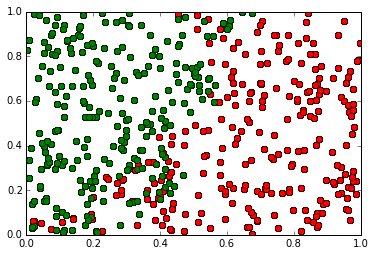

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    for i in range(len(people[2])):
        individual =  schelling(people[0][i],people[1][i],people[2][i])
        people[0][i], people[1][i] = individual.move(people)
    
    
 
    plt.plot(people[0][:250], people[1][:250], "ro")
    plt.plot(people[0][250:], people[1][250:], "go")

In [58]:
class Town :
    
    def __init__(self,n_g,n_or) :
        self.n_g, self.n_or = n_g, n_or
        import numpy as np
        self.list_people = []
        #orange = 1,green=0
        
        
        for i in range(self.n_g):
            individual = Schelling(0)
            individual.index = i
            self.list_people.append(individual)
        for i in range(self.n_or):
            individual = Schelling(1)
            individual.index = i+self.n_g
            self.list_people.append(individual)
            
    def ask(self,individual):
        others = self.list_people[:]
        others.pop(individual.index)
        
        others_loc_type = []
        location_x = []
        location_y = []
        type_set = []
        for other in others:
            location_x.append(other.x)
            location_y.append(other.y)
            type_set.append(other.type_)
        
        others_loc_type.append(location_x)
        others_loc_type.append(location_y)
        others_loc_type.append(type_set)
            
        return individual.emotion(others_loc_type)
    
    def make_map(self,label):
        import matplotlib.pyplot as plt

        N = self.n_or + self.n_g
        x_g = []
        x_or = []
        y_g = []
        y_or = []
        
        for i in range(N):  
            if self.list_people[i].type_ == 1:
                x_g.append(self.list_people[i].x)
                y_g.append(self.list_people[i].y)
            else:
                x_or.append(self.list_people[i].x)
                y_or.append(self.list_people[i].y)
        self.map_g = plt.plot(x_g, y_g, "go")
        self.map_or = plt.plot(x_or,y_or, "ro")
        

    def show_map(self):

        self.make_map()
        plt.show()

    def make_ev_happy(self):
        step = 0
        self.show_map()

        for i in range(500):
                if self.ask(self.list_people[i]) == 0:
                    unhappy += 1
                    break

        while nuhappy != 0:
            unhappy = 0
            for i in range(500):
                if self.ask(self.list_people[i]) == 0:
                    unhappy += 1
                while self.ask(self.list_people[i]) == 0:
                    self.list_people[i].move
            self.show_map()

            step += 1


            
    
       
    
class Schelling :
    """docstring for Schelling """
    def __init__(self,type_):
        import numpy as np
        #typeはorangeなら0 greenなら1にする
        self.x,self.y= np.random.uniform(0,1),np.random.uniform(0,1)
        self.type_= type_


    def emotion(self, others_loc_type):
        import numpy as np
        #happyなら1を返す
        #other_peopleはarrayで位置とtypeが入っているとする
        #people[0]:x,people[1]:y,people[2]:type
        n_neighbor = 10
        dist = []
        neighbor_index = []
        
        X = np.array(others_loc_type[0])-self.x
        Y = np.array(others_loc_type[1])-self.y
        dist.append(np.sqrt(X**2 + Y**2))
        dist.append(others_loc_type[2])
                    
        cond = dist[0].argsort()< n_neighbor
        
        n = 0
        for i in cond:
            n = n + 1
            if i == True:
                neighbor_index.append(n)
        n=0
        for i in neighbor_index:
            n = others_loc_type[2][i] + n
        #orange greenの人を抜き出す 
        n_green = n
        n_orange = 10 - n_green
        
        if self.type_ == 0:
            if n_orange>=5:
                return 1
            else:
                return 0
        else:
            if n_green>=5:
                return 1
            else:
                return 0


    def move(self):#emは0,1のどちらかで1だとhappy
        self.x = np.random.uniform(0,1)
        self.y = np.random.uniform(0,1)